In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.0f}'.format)

In [3]:
capital_project = pd.read_json("Data Source/Select+Active+Capital+Projects.json")

In [4]:
capital_project.head()

,Project Name,Civic Association,Division,Budget,Project Status,Project Phase,Project Type
0,AH15 - Aurora Hills Community Senior Center & ...,Aurora Hills,Facilities & Engineering,0,Active,Construction,Aurora Hills Complex Interior Renovation
1,AP01 - 8th Road North - Ashlawn School,Bluemont,Transportation & Development Services,1369000,Active,Design,Safe Routes To Schools
2,AP01 - 8th Road North - Ashlawn School,Boulevard Manor,Transportation & Development Services,1369000,Active,Design,Safe Routes To Schools
3,AP01 - 8th Road North - Ashlawn School,Dominion Hills,Transportation & Development Services,1369000,Active,Design,Safe Routes To Schools
4,AP02/AP03 - North Manchester St - Ashlawn School,Bluemont,Transportation & Development Services,853560,Active,Construction,Safe Routes To Schools


In [5]:
capital_project.describe()

,Budget
count,68
mean,6903191
std,9150859
min,0
25%,1016920
50%,3000000
75%,12630000
max,47860000


In [6]:
capital_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Project Name       68 non-null     object 
 1   Civic Association  68 non-null     object 
 2   Division           68 non-null     object 
 3   Budget             68 non-null     float64
 4   Project Status     68 non-null     object 
 5   Project Phase      68 non-null     object 
 6   Project Type       68 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.8+ KB


In [7]:
capital_project.head()

,Project Name,Civic Association,Division,Budget,Project Status,Project Phase,Project Type
0,AH15 - Aurora Hills Community Senior Center & ...,Aurora Hills,Facilities & Engineering,0,Active,Construction,Aurora Hills Complex Interior Renovation
1,AP01 - 8th Road North - Ashlawn School,Bluemont,Transportation & Development Services,1369000,Active,Design,Safe Routes To Schools
2,AP01 - 8th Road North - Ashlawn School,Boulevard Manor,Transportation & Development Services,1369000,Active,Design,Safe Routes To Schools
3,AP01 - 8th Road North - Ashlawn School,Dominion Hills,Transportation & Development Services,1369000,Active,Design,Safe Routes To Schools
4,AP02/AP03 - North Manchester St - Ashlawn School,Bluemont,Transportation & Development Services,853560,Active,Construction,Safe Routes To Schools


#### Find the average budget for each Civic Association and identify the top 5 most expensive areas based on budget.

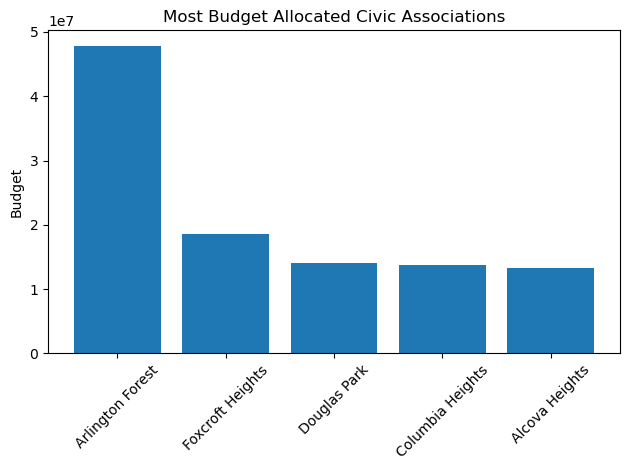

In [8]:
civic_assoc = capital_project.groupby('Civic Association')['Budget'].mean().reset_index().sort_values(by='Budget',ascending=False)[:5]

plt.bar(data=civic_assoc,x='Civic Association',height='Budget')
plt.title('Most Budget Allocated Civic Associations')
plt.ylabel('Budget')
plt.xticks(rotation = 45)
plt.tight_layout()                                                                                                              

#### Are there any Project with a budget of zero? What is their Project Status?

In [9]:
capital_project.loc[capital_project['Budget'] == 0,['Project Name','Project Status','Budget']]

,Project Name,Project Status,Budget
0,AH15 - Aurora Hills Community Senior Center & ...,Active,0
14,CL16 - Central Library Modernization-Construct...,Active,0
47,NE52 - S Taylor St & 12th Rd S - Barcroft,Active,0
48,RL16 - Relining CY 2016,Active,0
49,S43D - LLB Fld Risk Reduction Project,Active,0
65,VW15 - Heavy Vehicle Wash Facility,Active,0
67,WI71 - Gravity One Supply Phase I Project,Active,0


#### What stage of project phase are we mostly on, if so, what is its project status?

In [43]:
project_phase = capital_project.loc[capital_project['Project Phase']==capital_project['Project Phase'].value_counts().index[0]]
project_phase[['Project Phase','Project Type','Project Status']]

,Project Phase,Project Type,Project Status
1,Design,Safe Routes To Schools,Active
2,Design,Safe Routes To Schools,Active
3,Design,Safe Routes To Schools,Active
12,Design,Crystal City Streets,Active
13,Design,Crystal City Streets,Active
17,Design,Lee Highway Multimodal Improvements,Active
18,Design,Lee Highway Multimodal Improvements,Active
19,Design,0,Active
20,Design,0,Active
22,Design,Columbia Pike Streets,Active


#### What are the most frequent and dominant project types?


Text(0, 0.5, 'Type')

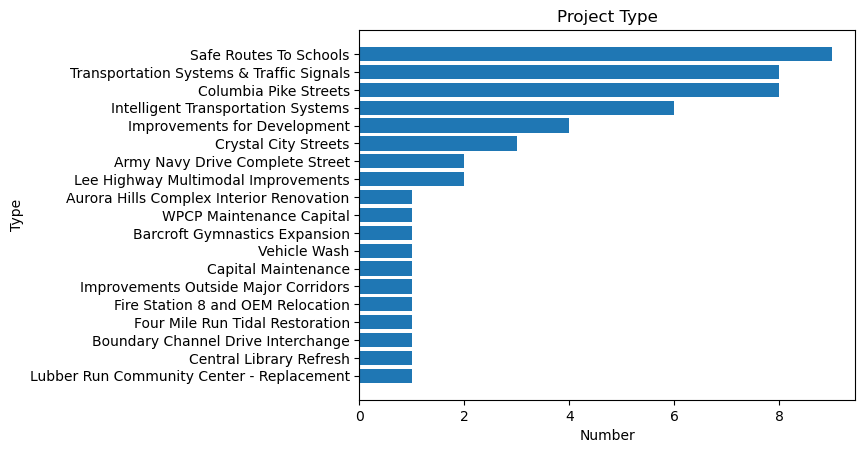

In [23]:
project_type = capital_project[capital_project['Project Type']!='0']['Project Type']
type_ct = project_type.value_counts().sort_values()

plt.barh(y=type_ct.index,width=type_ct.values)
plt.title('Project Type')
plt.xlabel('Number')
plt.ylabel('Type')

#### How does the budget distribution vary across different divisions and project phases, and which division or phase receives the largest allocation?

C:\Users\binch\AppData\Local\Temp\ipykernel_23784\2674609809.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  budge_by_div = capital_project.groupby(['Division','Project Phase']).sum().reset_index()


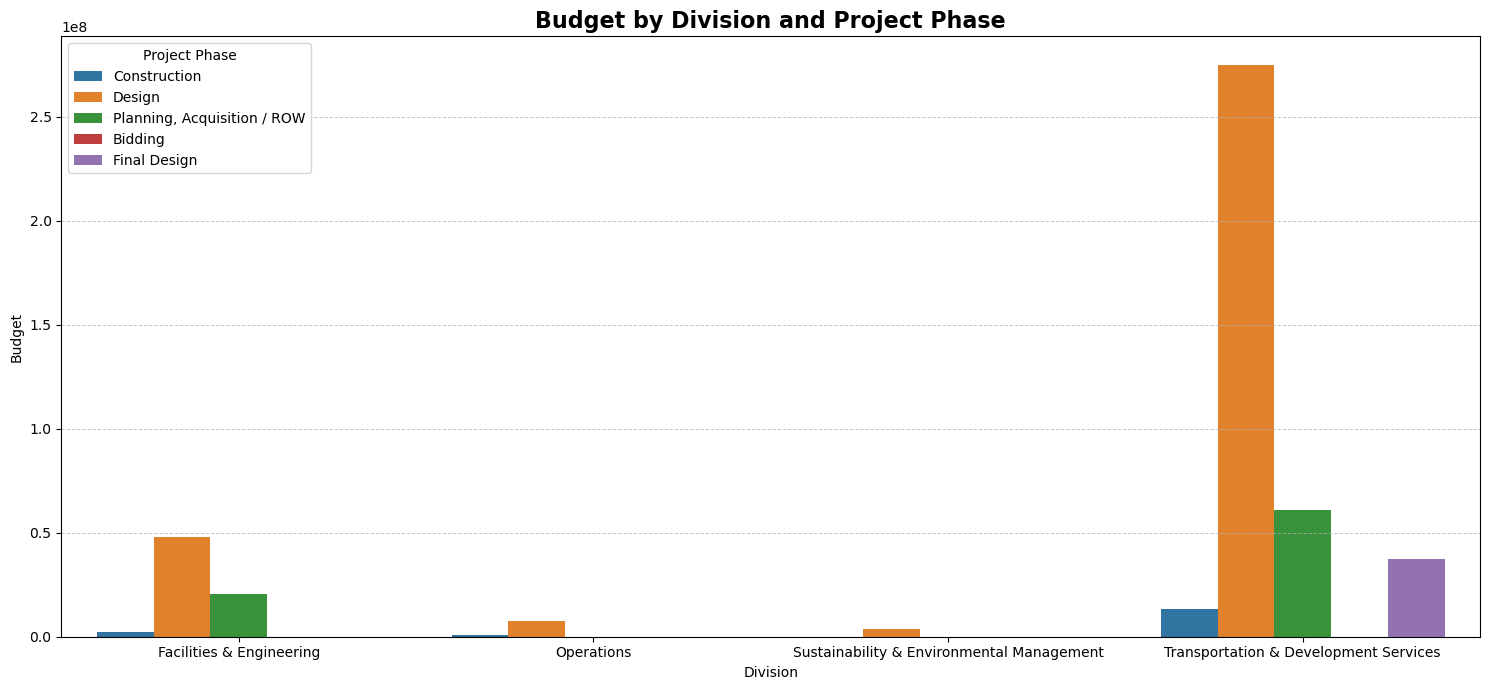

In [ ]:
budge_by_div = capital_project.groupby(['Division','Project Phase']).sum().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(data=budge_by_div,x='Division',hue='Project Phase',y='Budget')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Budget by Division and Project Phase', fontsize = 16, fontweight = 'bold')
plt.tight_layout()